## Regressão Linear Simples

- Usaremos um dataset do Kaggle contendo o consumo de cerveja em São Paulo
- Nosso objetivo é prever qual o consumo em litros, baseado na temperatura média

In [1]:
# importar bibliotecas necessárias
from sklearn import linear_model # importa o modelo de Regressão Linear
from sklearn.model_selection import train_test_split # importa uma 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# setar configurações
%matplotlib inline
pd.options.display.max_rows = 6000
pd.options.display.max_columns = 999

In [3]:
# Ler dataset para dataframe
df_consumo = pd.read_csv("../datasets/Consumo_cerveja.csv")

In [4]:
# Verificar estrutura dataset
df_consumo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
Data                           365 non-null object
Temperatura Media (C)          365 non-null object
Temperatura Minima (C)         365 non-null object
Temperatura Maxima (C)         365 non-null object
Precipitacao (mm)              365 non-null object
Final de Semana                365 non-null float64
Consumo de cerveja (litros)    365 non-null float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [5]:
# Ajustar nomes de variáveis
df_consumo.columns = ['data', 'temp_media', 'temp_minima', 'temp_maxima', 'chuva', 'final_semana', 'consumo']

In [6]:
# Eliminar linhas do dataset se ao menos um valor for nulo
df_consumo.dropna(axis=0, how='any', inplace=True)

In [7]:
# Converter variáveis de temperatura e chuva para float

# Primeiro, substituir o caracter virgula por nulo, usando replace
df_consumo['temp_media'] = df_consumo['temp_media'].str.replace(',', '.')
df_consumo['temp_minima'] = df_consumo['temp_minima'].str.replace(',', '.')
df_consumo['temp_maxima'] = df_consumo['temp_maxima'].str.replace(',', '.')
df_consumo['chuva'] = df_consumo['chuva'].str.replace(',', '.')

# Segundo, converter para tipo Float
df_consumo['temp_media'] = df_consumo['temp_media'].astype('float')
df_consumo['temp_minima'] = df_consumo['temp_minima'].astype('float')
df_consumo['temp_maxima'] = df_consumo['temp_maxima'].astype('float')
df_consumo['chuva'] = df_consumo['chuva'].astype('float')

### Dividir dataset entre treinamento e teste

É muito comum termos que fazer essa divisão dos dados, principalmente quando estamos trabalhando com Machine Learning, pois, é necessário já que precisamos treinar o nosso modelo com uma partição dos dados e testar com outra.

Além disso, precisamos separar a variável preditora (X) da variável resposta (y)

In [8]:
# Definir X como sendo a variável preditora, no caso temp_media do Dataframe
X = df_consumo[['temp_media']]

# Definir y como sendo a variável resposta, no caso consumo do Dataframe
y = df_consumo[['consumo']]

# Vamos separar 70% dos dados para treinamento e 30% para teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Criar um estimador do tipo Regressão Linear

- Vamos criar um objeto de regressão linear, o qual usaremos para treinar um modelo com os dados de treinamento
- Com este mesmo objeto, será validado este modelo com os dados de teste

In [9]:
# Criar estimador de Regressão Linear
modelo = linear_model.LinearRegression()

### Treinar o modelo, informando a variável preditora (X) e variável resposta (y)

Na maioria dos casos, o método **fit** é o método que faz o treinamento do modelo

In [10]:
# Fazer o treinamento do modelo
modelo.fit(X_treinamento, y_treinamento)

# Mostrar a equação da reta
m = modelo.coef_[0][0]
b = modelo.intercept_[0]
print(f'm = {m:.1f}, b = {b:.1f}')
print(f'Equação da reta: y = {m:.1f}x + {b:.1f}')

m = 0.7, b = 9.8
Equação da reta: y = 0.7x + 9.8


### Mostrar a reta da equação, com os pontos

Considerando a equação que o modelo gerou, vamos usar o matplotlib para mostrar a correlação entre X e Y e a reta
Pra isso, usaremos os dados de teste

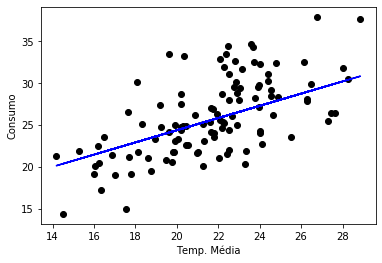

In [11]:
# Scatter plot da altura e peso de cada pessoa
plt.scatter(X_teste, y_teste, color='black')

# Gráfico de linha 
predicted_values = modelo.predict(X_teste)
plt.plot(X_teste, predicted_values, color='blue')
plt.xlabel('Temp. Média')
plt.ylabel('Consumo')

plt.show()

In [12]:
# Mostrar o score (acurácia) do modelo
modelo.score(X_teste, y_teste)

0.36598429193455273